In [21]:
import pandas as pd
import numpy as np

from IPython.core.display import HTML

# COVID-19 data

In [52]:
# Total

In [66]:
world_ts = pd.read_csv('ts_world_covid19.csv')
mexico_ts = pd.read_csv('ts_mexico_covid19.csv')

In [67]:
w_total = world_ts[['Date_Confirmed','China','Italy','Korea, South','Mexico','US']]
mex_total = mexico_ts[['Date_Confirmed','CIUDAD DE MÉXICO','NUEVO LEÓN','JALISCO']]

In [69]:
# Daily

In [70]:
world_delta = pd.read_csv('delta_world_covid19.csv')
mexico_delta = pd.read_csv('delta_mexico_covid19.csv')

In [71]:
w_delta = world_ts[['Date_Confirmed','China','Italy','Korea, South','Mexico','US']]
mex_delta = mexico_ts[['Date_Confirmed','CIUDAD DE MÉXICO','NUEVO LEÓN','JALISCO']]

In [72]:
# Merge

In [75]:
dfs_total = [w_total, mex_total]
totals = pd.concat(dfs_total, sort=True).fillna(0)

In [76]:
totals

,CIUDAD DE MÉXICO,China,Date_Confirmed,Italy,JALISCO,"Korea, South",Mexico,NUEVO LEÓN,US
0,0.0,17.0,2020-01-22,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,19.0,2020-01-23,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,28.0,2020-01-24,0.0,0.0,2.0,0.0,0.0,2.0
3,0.0,43.0,2020-01-25,0.0,0.0,2.0,0.0,0.0,2.0
4,0.0,63.0,2020-01-26,0.0,0.0,3.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
23,206.0,0.0,3/30/2020,0.0,91.0,0.0,0.0,75.0,0.0
24,234.0,0.0,3/31/2020,0.0,95.0,0.0,0.0,76.0,0.0
25,0.0,0.0,3/6/2020,0.0,0.0,0.0,0.0,0.0,0.0
26,235.0,0.0,3/7/2020,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
csse_ts = csse_ts.drop(['Province/State', 'Lat', 'Long'], axis=1)

In [95]:
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [96]:
csse_ts.index.name = 'Date_Confirmed'
csse_ts.reset_index(inplace=True)

In [98]:
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [100]:
csse_ts = csse_ts.resample('1D').mean().round()

In [102]:
csse_ts.to_csv('ts_world_covid19.csv', index=True)

### Mexico data (Secretaría de Salud)

In [76]:
mexico_ts = pd.read_csv('data/mexico_cumulative.csv')

In [77]:
mexico_ts

,Date_Confirmed,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
0,2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/1/2020,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
7,3/14/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3/15/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/16/2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [13]:
mexico = mexico.set_index(pd.DatetimeIndex(mexico['Date_Confirmed'])).sort_index()

In [14]:
mexico.drop('Date_Confirmed', axis=1, inplace=True)

In [15]:
mexico['Mexico'] = mexico.sum(axis=1)

In [16]:
df_mexico = mexico[['CIUDAD DE MÉXICO','JALISCO','NUEVO LEÓN','Mexico']]

In [17]:
df_mexico = df_mexico.reset_index(inplace=False)

In [18]:
df_mexico = df_mexico.rename(columns={'Date_Confirmed':'Last_Updated'})

In [19]:
df_mexico = df_mexico.set_index(pd.DatetimeIndex(df_mexico['Last_Updated'])).sort_index()

In [20]:
df_mexico.tail()

,Last_Updated,CIUDAD DE MÉXICO,JALISCO,NUEVO LEÓN,Mexico
Last_Updated,,,,,
2020-03-28,2020-03-28,178.0,83.0,NaN,681.0
2020-03-29,2020-03-29,197.0,84.0,67.0,912.0
2020-03-30,2020-03-30,206.0,91.0,75.0,981.0
2020-03-31,2020-03-31,234.0,95.0,76.0,1125.0
2020-04-01,2020-04-01,298.0,101.0,78.0,1305.0


### Merge Tables

In [21]:
dfs = [df_world, df_mexico]
cum_tbl = pd.concat(dfs, sort=True).drop('Last_Updated', axis=1)

In [22]:
cum_tbl = cum_tbl.resample('1D').mean().round()

In [23]:
cum_tbl

,CIUDAD DE MÉXICO,Italy,JALISCO,Mexico,NUEVO LEÓN,South Korea
Last_Updated,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-23,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-24,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-25,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-26,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...
2020-03-28,178.0,92472.0,83.0,681.0,NaN,NaN
2020-03-29,197.0,97689.0,84.0,912.0,67.0,NaN
2020-03-30,206.0,NaN,91.0,981.0,75.0,NaN


In [57]:
cum_tbl = cum_tbl[(cum_tbl.index > '2020-03-16') & (cum_tbl.index <= '2020-03-29')] # wtf mexico tiene 235 casos el 7?
cum_tbl

,CIUDAD DE MÉXICO,Italy,JALISCO,Mexico,NUEVO LEÓN,South Korea
Last_Updated,,,,,,
2020-03-17,0.0,31506.0,5.0,46.0,14.0,0.0
2020-03-18,23.0,35713.0,6.0,77.0,19.0,0.0
2020-03-19,30.0,41035.0,22.0,109.0,0.0,0.0
2020-03-20,31.0,47021.0,28.0,155.0,29.0,0.0
2020-03-21,45.0,53578.0,32.0,212.0,32.0,0.0
2020-03-22,56.0,59138.0,41.0,241.0,35.0,0.0
2020-03-23,60.0,63927.0,46.0,278.0,40.0,0.0
2020-03-24,66.0,69176.0,0.0,218.0,52.0,0.0
2020-03-25,82.0,74386.0,0.0,294.0,0.0,0.0


# Bottom line

In [58]:
# Cumulative cases
#total_cases_tbl = total_cases_tbl.fillna(0)
#total_cases_tbl = cum_tbl.reset_index(drop=True, inplace=True)

In [59]:
# Fill nas
cum_tbl = cum_tbl.fillna(0)

In [60]:
# Calculate daily cases
daily_cases_tbl = cum_tbl.diff().fillna(0).reset_index()

In [61]:
# Now new cases
new_cases_tbl = daily_cases_tbl._get_numeric_data()
new_cases_tbl[new_cases_tbl < 0] = 0

In [62]:
display(HTML(cum_tbl.to_html()))

,CIUDAD DE MÉXICO,Italy,JALISCO,Mexico,NUEVO LEÓN,South Korea
Last_Updated,,,,,,
2020-03-17,0.0,31506.0,5.0,46.0,14.0,0.0
2020-03-18,23.0,35713.0,6.0,77.0,19.0,0.0
2020-03-19,30.0,41035.0,22.0,109.0,0.0,0.0
2020-03-20,31.0,47021.0,28.0,155.0,29.0,0.0
2020-03-21,45.0,53578.0,32.0,212.0,32.0,0.0
2020-03-22,56.0,59138.0,41.0,241.0,35.0,0.0
2020-03-23,60.0,63927.0,46.0,278.0,40.0,0.0
2020-03-24,66.0,69176.0,0.0,218.0,52.0,0.0
2020-03-25,82.0,74386.0,0.0,294.0,0.0,0.0


In [63]:
display(HTML(new_cases_tbl.to_html()))

,CIUDAD DE MÉXICO,Italy,JALISCO,Mexico,NUEVO LEÓN,South Korea
0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,4207.0,1.0,31.0,5.0,0.0
2,7.0,5322.0,16.0,32.0,0.0,0.0
3,1.0,5986.0,6.0,46.0,29.0,0.0
4,14.0,6557.0,4.0,57.0,3.0,0.0
5,11.0,5560.0,9.0,29.0,3.0,0.0
6,4.0,4789.0,5.0,37.0,5.0,0.0
7,6.0,5249.0,0.0,0.0,12.0,0.0
8,16.0,5210.0,0.0,76.0,0.0,0.0
9,1.0,6203.0,65.0,242.0,57.0,0.0


# Plots

In [64]:
from numpy import *
import math
import matplotlib.pyplot as plt

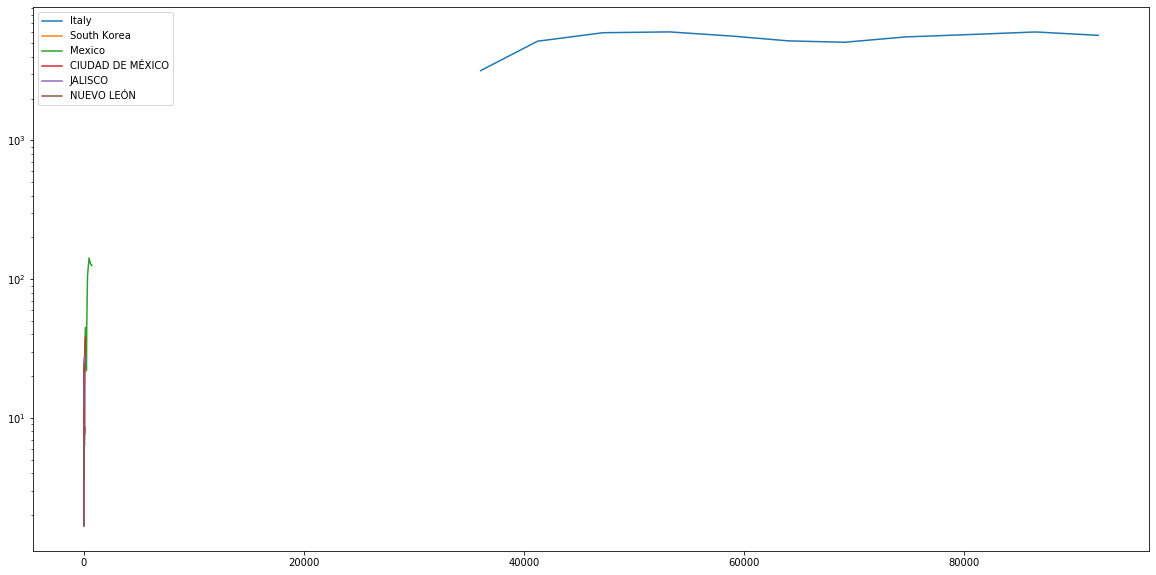

In [65]:
state_lane = {}

plt.figure(figsize=(20,10))

for region in ['Italy', 'South Korea', 'Mexico', 'CIUDAD DE MÉXICO', 'JALISCO', 'NUEVO LEÓN']:
    plt.plot(list(cum_tbl[region].dropna().rolling(window=3).mean()), list(new_cases_tbl[region].dropna().rolling(window=3).mean()), label=region) 
    #pd.DataFrame(list(pivot_tbl_cum[state].dropna()), list(pivot_tbl_delta[state].dropna())).to_csv('data/output_series/' + state + '.csv')

plt.legend()
plt.yscale('log')
plt.xscale('linear')

plt.show()

In [ ]:
# ^^^ clearly wrong :p
# notes for my future self:
# 1) CSSE data can be either cumulative or daily
# 2) plot isn't wrong BUT: MORE data is needed for Mexico trend to be noticeable! 
# 3) what can be done for the above?
# 4) make modular code pls
# 5) cookie-cutter the data

In [98]:
# Plots

#cum_tbl = cum_tbl[(cum_tbl.index > '2020-03-10') & (cum_tbl.index <= '2020-03-29')]
#cum_tbl.fillna(0).cumsum().plot(figsize=(20,10))